In [1]:
from scipy.stats import truncnorm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
def get_truncated_normal(mean=1, low=0, upp=10, sd=None):
    if sd==None:
        sd = max(abs(upp-mean),abs(low-mean))/7
        #sd=0.075*upp**(2/3)
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [121]:
bins = 10
result = pd.DataFrame(columns = np.arange(1,bins+1))
for i in range(1,bins+1):
    df = pd.Series(np.round(get_truncated_normal(mean=i,upp=bins).rvs(1000000)))
    indices = np.array((df.value_counts()/df.count()).index)
    df = (df.value_counts()/df.count())
    scores = np.zeros(bins)
    for ind in indices:
        scores[int(ind)-1] = df[ind]

    #plt.bar(np.arange(1,bins+1),height = scores)

    df = pd.DataFrame([scores], columns = np.arange(1,bins+1))

    result = pd.concat([result,df])
    
result.index = np.arange(1,bins+1)

In [122]:
result

,1,2,3,4,5,6,7,8,9,10
1,0.2631,0.2384,0.1737,0.1127,0.0546,0.0225,0.0070,0.0022,0.0012,0.1246
2,0.2083,0.2296,0.2075,0.1425,0.0760,0.0347,0.0111,0.0037,0.0007,0.0859
3,0.1221,0.2011,0.2370,0.1999,0.1285,0.0530,0.0188,0.0040,0.0009,0.0347
4,0.0361,0.1104,0.2126,0.2664,0.2088,0.1107,0.0381,0.0090,0.0012,0.0001
5,0.0024,0.0217,0.0909,0.2337,0.3076,0.2305,0.0920,0.0194,0.0016,0.0002
6,0.0014,0.0096,0.0353,0.1116,0.2068,0.2621,0.2213,0.1065,0.0386,0.0002
7,0.0005,0.0042,0.0224,0.0586,0.1164,0.2040,0.2310,0.1983,0.1286,0.0360
8,0.0006,0.0036,0.0115,0.0339,0.0790,0.1425,0.2105,0.2363,0.1996,0.0825
9,0.0007,0.0029,0.0096,0.0232,0.0564,0.1062,0.1782,0.2356,0.2603,0.1269
10,0.0005,0.0024,0.0059,0.0185,0.0393,0.0901,0.1587,0.2281,0.2946,0.0002


<BarContainer object of 30 artists>

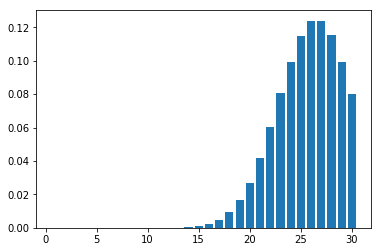

In [184]:
bins = 30
df = pd.Series(np.ceil(get_truncated_normal(mean=26,upp=bins).rvs(1000000)))
indices = np.array((df.value_counts()/df.count()).index)
df = (df.value_counts()/df.count())
scores = np.zeros(bins)
for ind in indices:
    scores[int(ind)-1] = df[ind]
plt.bar(np.arange(1,bins+1),height = scores)
#plt.bar(np.arange(1,bins+1),height = scores)

In [183]:
result.to_csv('scores_distribution.csv')